Data ingestion

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
train=pd.read_csv('train.csv')
train.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday
0,1,1,2010-02-05,24924.50,False
1,1,1,2010-02-12,46039.49,True
2,1,1,2010-02-19,41595.55,False
3,1,1,2010-02-26,19403.54,False
4,1,1,2010-03-05,21827.90,False


In [3]:
features=pd.read_csv('features.csv')
features.head()

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday
0,1,2010-02-05,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False
1,1,2010-02-12,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,True
2,1,2010-02-19,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,False
3,1,2010-02-26,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106,False
4,1,2010-03-05,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106,False


In [4]:
stores=pd.read_csv('stores.csv')
stores.head()

,Store,Type,Size
0,1,A,151315
1,2,A,202307
2,3,B,37392
3,4,A,205863
4,5,B,34875


In [5]:
merge1=features.merge(stores,on='Store',how='inner')
df=merge1.merge(train,on=['Store','Date','IsHoliday'],how='inner')

In [6]:
print(train.shape)
print(features.shape)
print(stores.shape)
print(df.shape)

(421570, 5)
(8190, 12)
(45, 3)
(421570, 16)


In [7]:
df.head()

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday,Type,Size,Dept,Weekly_Sales
0,1,2010-02-05,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False,A,151315,1,24924.50
1,1,2010-02-05,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False,A,151315,2,50605.27
2,1,2010-02-05,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False,A,151315,3,13740.12
3,1,2010-02-05,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False,A,151315,4,39954.04
4,1,2010-02-05,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False,A,151315,5,32229.38


In [8]:
train.columns

Index(['Store', 'Dept', 'Date', 'Weekly_Sales', 'IsHoliday'], dtype='object')

In [9]:
stores.columns

Index(['Store', 'Type', 'Size'], dtype='object')

In [10]:
df.columns

Index(['Store', 'Date', 'Temperature', 'Fuel_Price', 'MarkDown1', 'MarkDown2',
       'MarkDown3', 'MarkDown4', 'MarkDown5', 'CPI', 'Unemployment',
       'IsHoliday', 'Type', 'Size', 'Dept', 'Weekly_Sales'],
      dtype='object')

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 421570 entries, 0 to 421569
Data columns (total 16 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Store         421570 non-null  int64  
 1   Date          421570 non-null  object 
 2   Temperature   421570 non-null  float64
 3   Fuel_Price    421570 non-null  float64
 4   MarkDown1     150681 non-null  float64
 5   MarkDown2     111248 non-null  float64
 6   MarkDown3     137091 non-null  float64
 7   MarkDown4     134967 non-null  float64
 8   MarkDown5     151432 non-null  float64
 9   CPI           421570 non-null  float64
 10  Unemployment  421570 non-null  float64
 11  IsHoliday     421570 non-null  bool   
 12  Type          421570 non-null  object 
 13  Size          421570 non-null  int64  
 14  Dept          421570 non-null  int64  
 15  Weekly_Sales  421570 non-null  float64
dtypes: bool(1), float64(10), int64(3), object(2)
memory usage: 48.6+ MB


In [12]:
df.isnull().sum()

Store                0
Date                 0
Temperature          0
Fuel_Price           0
MarkDown1       270889
MarkDown2       310322
MarkDown3       284479
MarkDown4       286603
MarkDown5       270138
CPI                  0
Unemployment         0
IsHoliday            0
Type                 0
Size                 0
Dept                 0
Weekly_Sales         0
dtype: int64

In [13]:
df=df.rename(columns={'MarkDown1':'Promation_1','MarkDown2':'Promation_2','MarkDown3':'Promation_3','MarkDown4':'Promation_4','MarkDown5':'Promation_5'})
df.columns

Index(['Store', 'Date', 'Temperature', 'Fuel_Price', 'Promation_1',
       'Promation_2', 'Promation_3', 'Promation_4', 'Promation_5', 'CPI',
       'Unemployment', 'IsHoliday', 'Type', 'Size', 'Dept', 'Weekly_Sales'],
      dtype='object')

In [14]:
df.fillna(0,inplace=True)

In [15]:
features.columns

Index(['Store', 'Date', 'Temperature', 'Fuel_Price', 'MarkDown1', 'MarkDown2',
       'MarkDown3', 'MarkDown4', 'MarkDown5', 'CPI', 'Unemployment',
       'IsHoliday'],
      dtype='object')

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 421570 entries, 0 to 421569
Data columns (total 16 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Store         421570 non-null  int64  
 1   Date          421570 non-null  object 
 2   Temperature   421570 non-null  float64
 3   Fuel_Price    421570 non-null  float64
 4   Promation_1   421570 non-null  float64
 5   Promation_2   421570 non-null  float64
 6   Promation_3   421570 non-null  float64
 7   Promation_4   421570 non-null  float64
 8   Promation_5   421570 non-null  float64
 9   CPI           421570 non-null  float64
 10  Unemployment  421570 non-null  float64
 11  IsHoliday     421570 non-null  bool   
 12  Type          421570 non-null  object 
 13  Size          421570 non-null  int64  
 14  Dept          421570 non-null  int64  
 15  Weekly_Sales  421570 non-null  float64
dtypes: bool(1), float64(10), int64(3), object(2)
memory usage: 48.6+ MB


In [17]:
df['IsHoliday'].unique()

array([False,  True])

In [18]:
df['IsHoliday']=df['IsHoliday'].astype(str)
df['IsHoliday']=df['IsHoliday'].str.strip()
df['IsHoliday']=df['IsHoliday'].replace({'True':1,'False':0})
df['IsHoliday']=df['IsHoliday'].astype(int)


C:\Users\DELL\AppData\Local\Temp\ipykernel_4548\1237063896.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['IsHoliday']=df['IsHoliday'].replace({'True':1,'False':0})


In [19]:
df['Type'].unique()

array(['A', 'B', 'C'], dtype=object)

In [20]:
df['Type']=df['Type'].astype(str)
df['Type']=df['Type'].str.strip()
df['Type']=df['Type'].replace({'A':1,'B':2,'C':3})
df['Type']=df['Type'].astype(int)


C:\Users\DELL\AppData\Local\Temp\ipykernel_4548\2773470439.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['Type']=df['Type'].replace({'A':1,'B':2,'C':3})


In [21]:
df.head()

,Store,Date,Temperature,Fuel_Price,Promation_1,Promation_2,Promation_3,Promation_4,Promation_5,CPI,Unemployment,IsHoliday,Type,Size,Dept,Weekly_Sales
0,1,2010-02-05,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,0,1,151315,1,24924.50
1,1,2010-02-05,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,0,1,151315,2,50605.27
2,1,2010-02-05,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,0,1,151315,3,13740.12
3,1,2010-02-05,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,0,1,151315,4,39954.04
4,1,2010-02-05,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,0,1,151315,5,32229.38


In [22]:
df['Date']=pd.to_datetime(df['Date'])

In [23]:
df['Date'].dtype

dtype('<M8[ns]')

<Axes: >

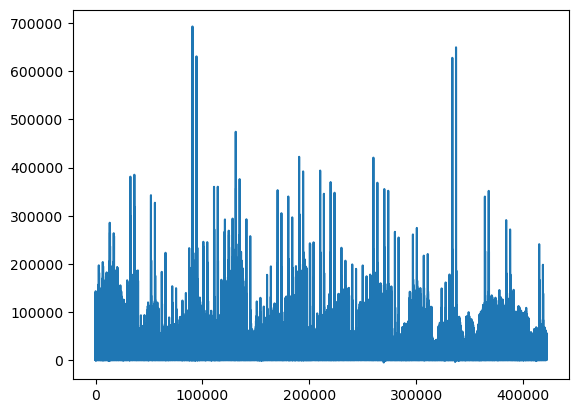

In [24]:
df['Weekly_Sales'].plot()

Store 1

In [25]:
data=df[['Date','Weekly_Sales','Store','Dept']]
data=data.set_index('Date')
data.Store.unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45], dtype=int64)

In [26]:
data.Store.shape

(421570,)

In [27]:
data=data[(data['Store']==1)& (data['Dept']==1)]

In [28]:
data.Store.shape

(143,)

In [29]:
print(data.Store.unique())
print(data.Dept.unique())

[1]
[1]


In [30]:
data=data.drop('Store',axis=1)
data=data.drop('Dept',axis=1)
data

,Weekly_Sales
Date,
2010-02-05,24924.50
2010-02-12,46039.49
2010-02-19,41595.55
2010-02-26,19403.54
2010-03-05,21827.90
...,...
2012-09-28,18947.81
2012-10-05,21904.47
2012-10-12,22764.01


In [31]:
data['Weekly_Sales'].sort_values().head(10)

Date
2011-08-26    14537.37
2011-08-12    14539.79
2011-08-19    14689.24
2010-05-21    14773.04
2011-06-17    14978.09
2011-05-20    15136.78
2011-09-02    15277.27
2011-08-05    15295.55
2010-07-23    15360.45
2011-07-01    15363.50
Name: Weekly_Sales, dtype: float64

In [32]:
data.tail()

,Weekly_Sales
Date,
2012-09-28,18947.81
2012-10-05,21904.47
2012-10-12,22764.01
2012-10-19,24185.27
2012-10-26,27390.81


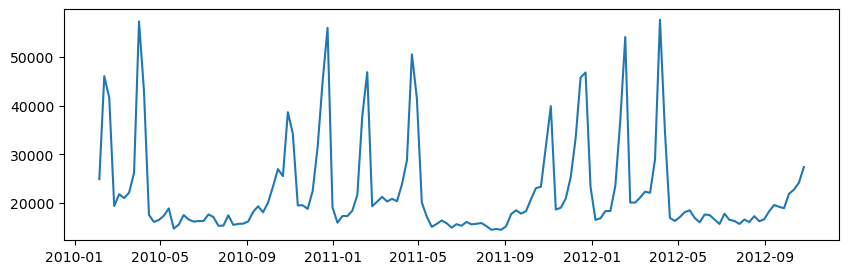

In [33]:
plt.figure(figsize=(10,3))
plt.plot(data.Weekly_Sales)


In [34]:
from statsmodels.tsa.seasonal import seasonal_decompose
result=seasonal_decompose(data["Weekly_Sales"],model= "addictivite",period=52)

<Figure size 2000x800 with 0 Axes>

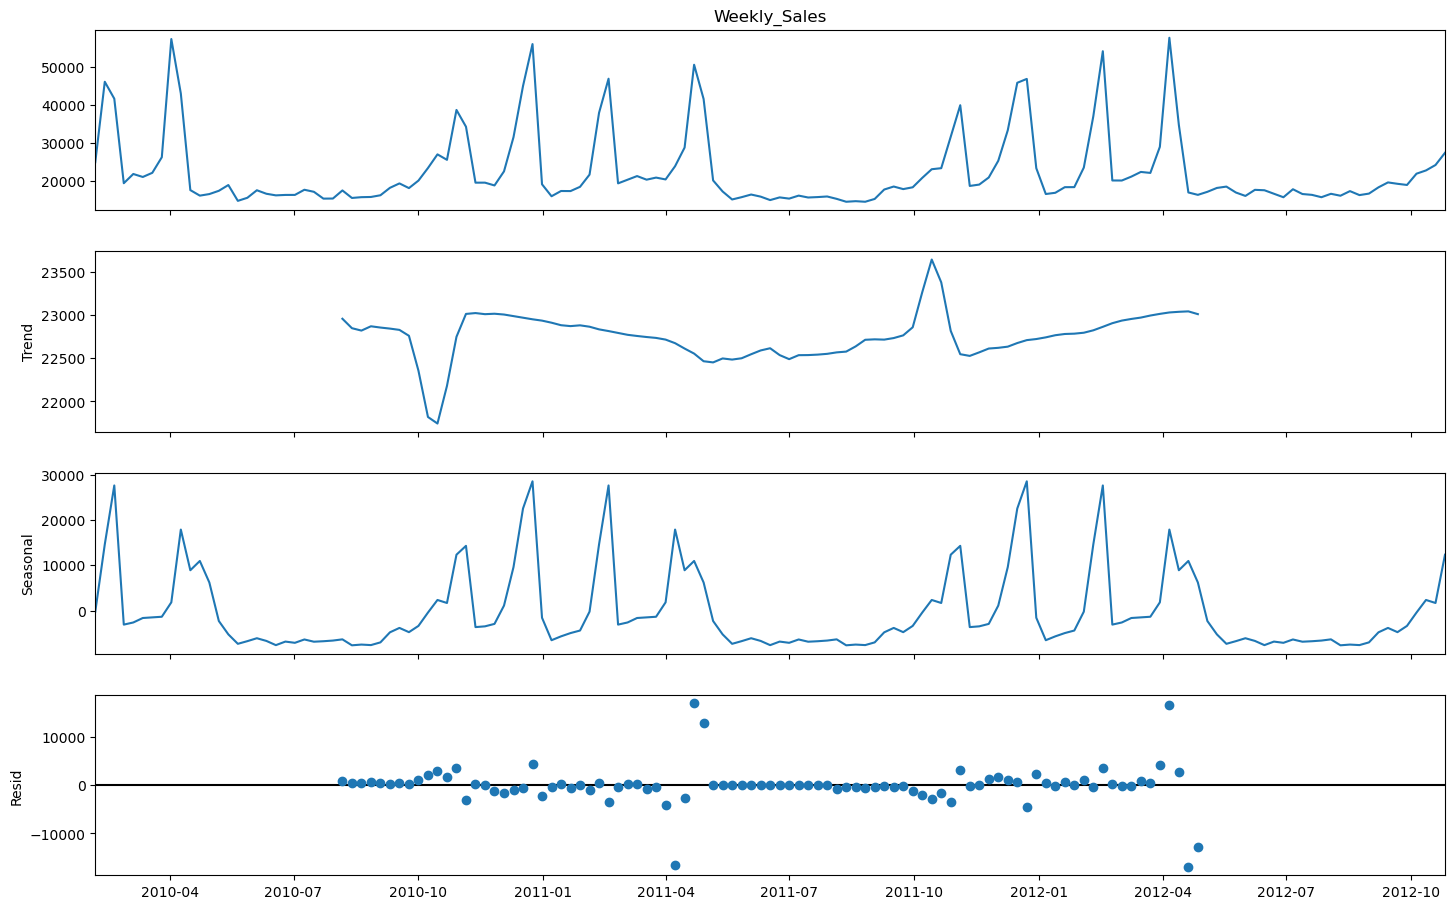

In [41]:
plt.figure(figsize=(20,8))
fig=result.plot()
fig.set_size_inches(17,10)

<Axes: ylabel='Weekly_Sales'>

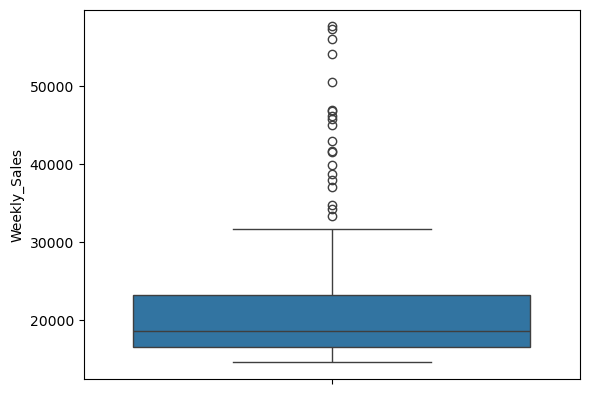

In [36]:
sns.boxplot(data['Weekly_Sales'])

<Axes: xlabel='Date', ylabel='Weekly_Sales'>

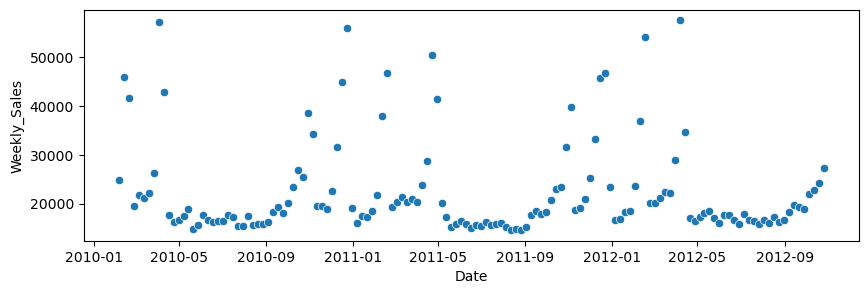

In [37]:
plt.figure(figsize=(10,3))
sns.scatterplot(data['Weekly_Sales'])


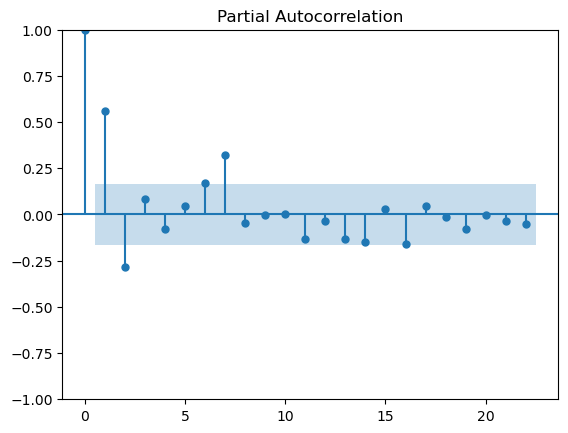

<Figure size 300x300 with 0 Axes>

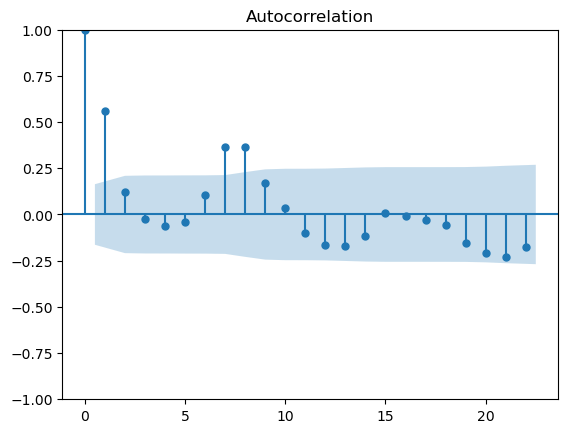

<Figure size 300x300 with 0 Axes>

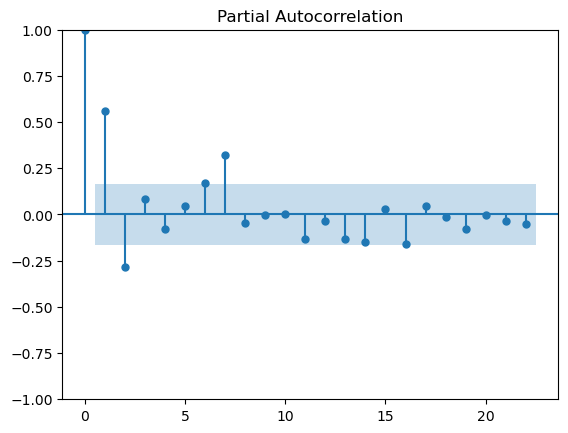

In [38]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
plt.figure(figsize=(3,3))
plot_acf(data.Weekly_Sales)

plt.figure(figsize=(3,3))

plot_pacf(data.Weekly_Sales)